['(20.11541438766307', '(15.200086041781336', '(17.200234546952956', '(16.785685905190583', '(20.8917697133121', '(20.41359589938329', '(22.137436541638763', '(15.695510661035328', '(18.375374557482164', '(15.238377755504562', '(16.749103798428827', '(19.042842304826898', '(15.212287757470909', '(16.59070120549319', '(20.199075502236184', '(19.35953184482573', '(16.763524976325574', '(19.71412547100727', '(21.475443653422612', '(15.051990077424488', '(21.446554014662464', '(20.585115159905815', '(17.722004132143937', '(16.24383599849425', '(22.65770457765425', '(17.692756360901015', '(15.741966747041182', '(15.773731014667712', '(21.779954930779677', '(19.82980825093513', '(21.45702618619504', '(20.837854293550542', '(19.289824731637605', '(22.784926111834963', '(18.02827501766683', '(19.416325050185815', '(21.63523731402396', '(19.94815801891397', '(21.89365520248622', '(19.618817162054096', '(20.63657468971939', '(15.366595069245298', '(16.823186205212373', '(17.315103708816856', '(1

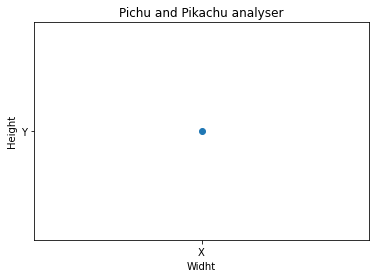

In [108]:
import matplotlib.pyplot as plt

pichuFiles = "files/pichu.txt"
pikachuFiles = "files/pikachu.txt"

pichuWidht = []
pichuHeight = []
pikachuProperties = []

with open(pichuFiles, "r") as pichu, open(pikachuFiles, "r") as pikachu:    ## Opens the files as a variable for easy use
    for i, pichuData in enumerate(pichu.readlines()):     ## Creats a for loop that reads the data from a specifc file line by line.
        if i == 0:  ## Removes the first line in the text file
            continue
        widht, height = pichuData.split(",")    # Splits the data into two diffrent points

        pichuWidht.append(widht)
        pichuHeight.append(height)

print(pichuWidht)
print(pichuHeight)

plt.plot_date("X", "Y")
plt.xlabel("Widht")
plt.ylabel("Height")
plt.title("Pichu and Pikachu analyser")
plt.show()